In [ ]:
Kimport pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [ ]:
file_path = '/content/Attrition data.csv'
attrition_data = pd.read_csv(file_path)

In [ ]:
attrition_data.head()

,EmployeeID,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,Gender,...,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
0,1,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,Female,...,1.0,6,1,0,0,3.0,4.0,2.0,3,3
1,2,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,Female,...,6.0,3,5,1,4,3.0,2.0,4.0,2,4
2,3,32,No,Travel_Frequently,Research & Development,17,4,Other,1,Male,...,5.0,2,5,0,3,2.0,2.0,1.0,3,3
3,4,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,Male,...,13.0,5,8,7,5,4.0,4.0,3.0,2,3
4,5,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,Male,...,9.0,2,6,0,4,4.0,1.0,3.0,3,3


In [ ]:
# Check for missing values
missing_values = attrition_data.isnull().sum()
print("Missing Values:\n", missing_values)

# Drop columns with single unique value or not useful for analysis
attrition_data = attrition_data.drop(columns=['EmployeeCount', 'EmployeeID', 'Over18', 'StandardHours'])

# Encode categorical variables
categorical_cols = attrition_data.select_dtypes(include=['object']).columns

# Apply label encoding
label_encoder = LabelEncoder()
for col in categorical_cols:
    attrition_data[col] = label_encoder.fit_transform(attrition_data[col])

# Display the cleaned data
attrition_data.head()

Missing Values:
 EmployeeID                  0
Age                         0
Attrition                   0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
Gender                      0
JobLevel                    0
JobRole                     0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked         19
Over18                      0
PercentSalaryHike           0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           9
TrainingTimesLastYear       0
YearsAtCompany              0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
EnvironmentSatisfaction    25
JobSatisfaction            20
WorkLifeBalance            38
JobInvolvement              0
PerformanceRating           0
dtype: int64


,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,JobRole,...,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
0,51,0,2,2,6,2,1,0,1,0,...,1.0,6,1,0,0,3.0,4.0,2.0,3,3
1,31,1,1,1,10,1,1,0,1,6,...,6.0,3,5,1,4,3.0,2.0,4.0,2,4
2,32,0,1,1,17,4,4,1,4,7,...,5.0,2,5,0,3,2.0,2.0,1.0,3,3
3,38,0,0,1,2,5,1,1,3,1,...,13.0,5,8,7,5,4.0,4.0,3.0,2,3
4,32,0,2,1,10,1,3,1,1,7,...,9.0,2,6,0,4,4.0,1.0,3.0,3,3


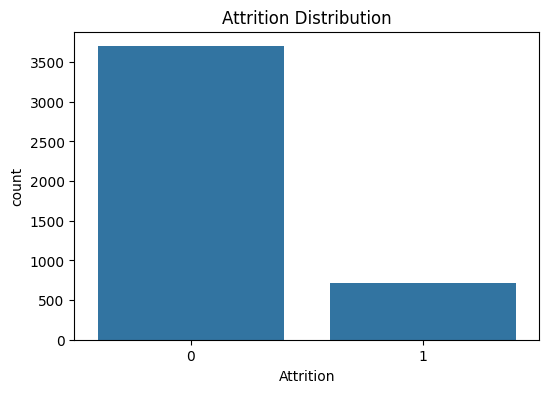

In [ ]:
# Plot the distribution of the target variable 'Attrition'
plt.figure(figsize=(6, 4))
sns.countplot(x='Attrition', data=attrition_data)
plt.title('Attrition Distribution')
plt.show()




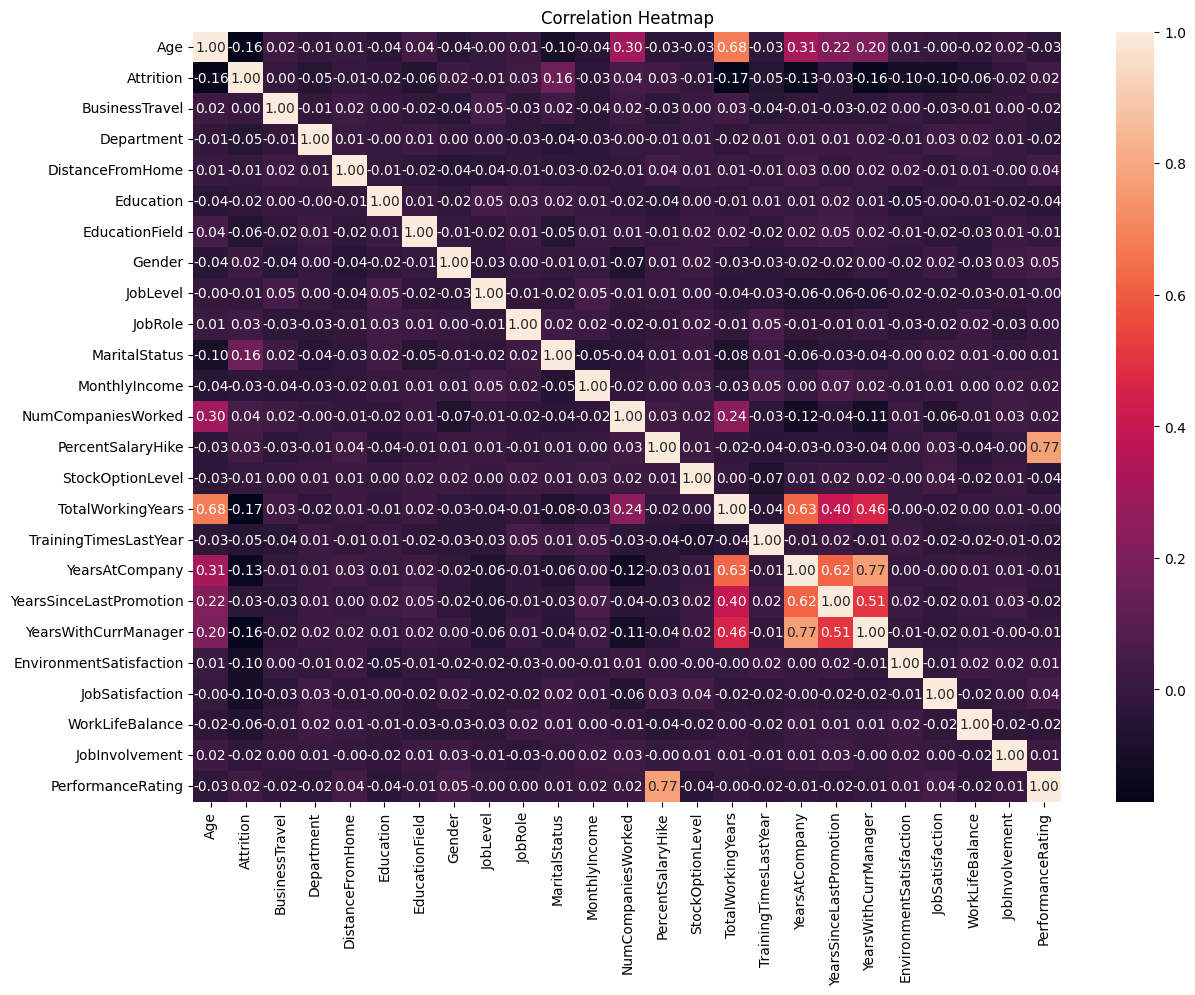

In [ ]:
# Plot correlation heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(attrition_data.corr(), annot=True, fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()



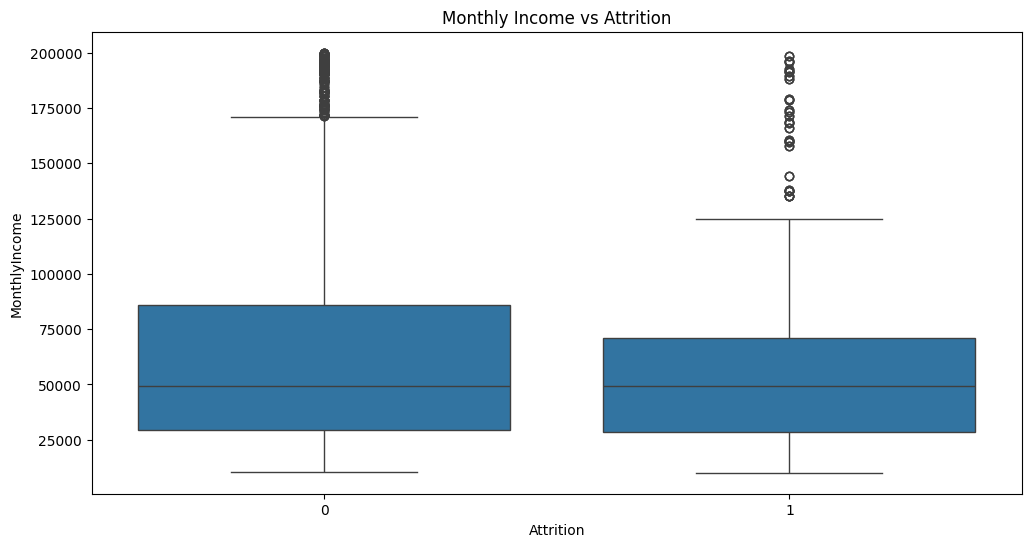

In [ ]:
# Analyze the impact of key features on attrition
plt.figure(figsize=(12, 6))
sns.boxplot(x='Attrition', y='MonthlyIncome', data=attrition_data)
plt.title('Monthly Income vs Attrition')
plt.show()

In [ ]:
#Creating a new feature
attrition_data['YearsAtCompanyPerAge'] = attrition_data['YearsAtCompany'] / attrition_data['Age']

# Select important features
selected_features = ['Age', 'BusinessTravel', 'Department', 'DistanceFromHome', 'Education',
                     'EnvironmentSatisfaction', 'Gender', 'JobRole', 'JobSatisfaction',
                     'MaritalStatus', 'MonthlyIncome', 'TotalWorkingYears',
                     'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
                     'YearsSinceLastPromotion', 'YearsWithCurrManager']

X = attrition_data[selected_features]
y = attrition_data['Attrition']


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Training a RF model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [ ]:
y_pred = model.predict(X_test)

# Evaluate the model
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))

Confusion Matrix:
 [[741   0]
 [  7 134]]
Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00       741
           1       1.00      0.95      0.97       141

    accuracy                           0.99       882
   macro avg       1.00      0.98      0.98       882
weighted avg       0.99      0.99      0.99       882

Accuracy Score: 0.9920634920634921


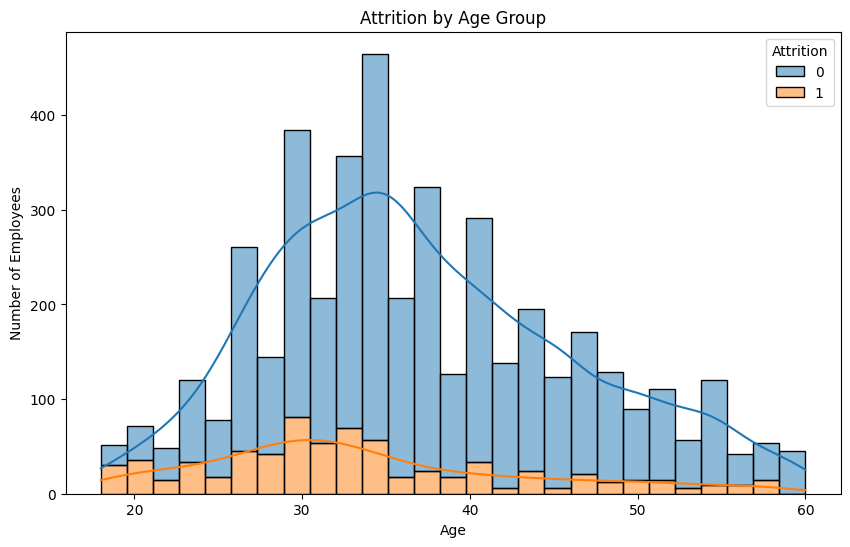

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=attrition_data, x='Age', hue='Attrition', multiple='stack', kde=True)
plt.title('Attrition by Age Group')
plt.xlabel('Age')
plt.ylabel('Number of Employees')
plt.show()


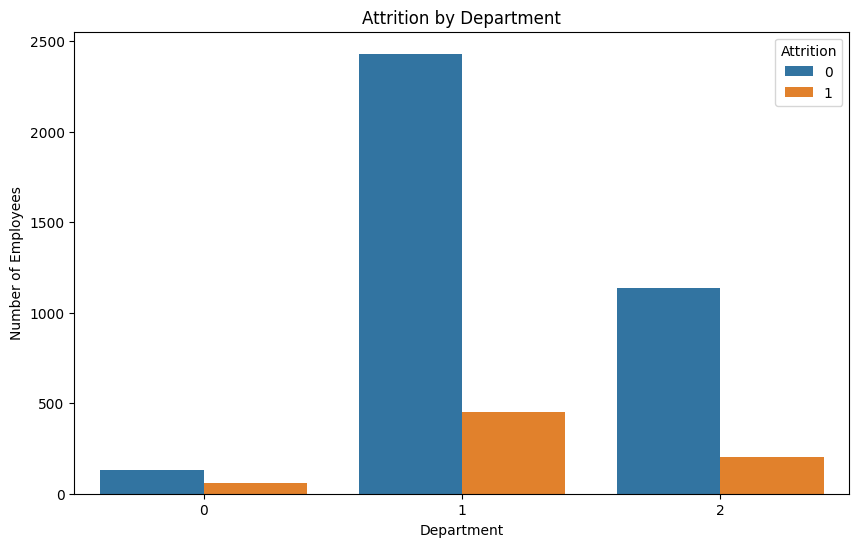

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Department', hue='Attrition', data=attrition_data)
plt.title('Attrition by Department')
plt.xlabel('Department')
plt.ylabel('Number of Employees')
plt.show()


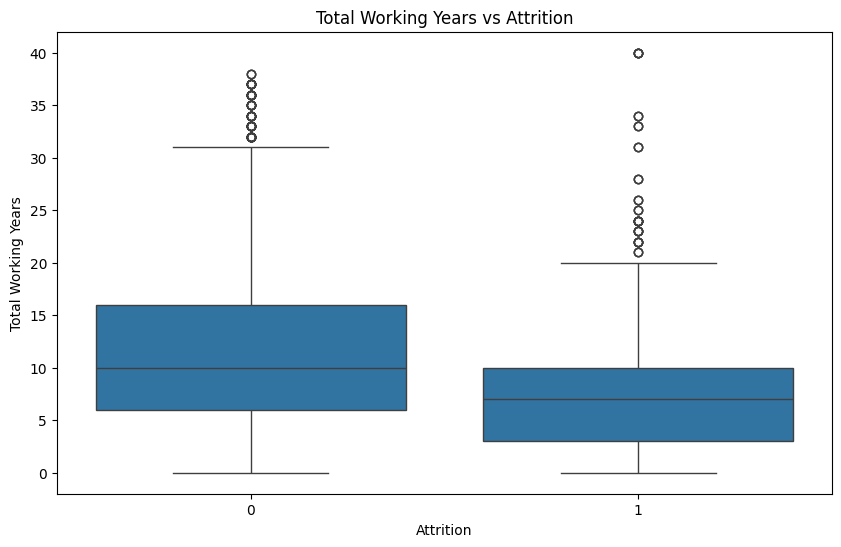

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Attrition', y='TotalWorkingYears', data=attrition_data)
plt.title('Total Working Years vs Attrition')
plt.xlabel('Attrition')
plt.ylabel('Total Working Years')
plt.show()



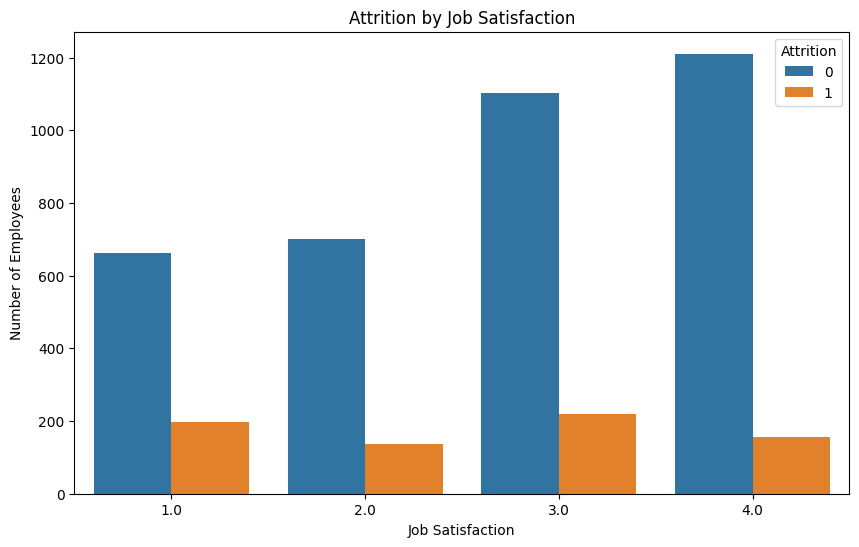

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='JobSatisfaction', hue='Attrition', data=attrition_data)
plt.title('Attrition by Job Satisfaction')
plt.xlabel('Job Satisfaction')
plt.ylabel('Number of Employees')
plt.show()
